#Data Trend Analysis

1) In general, Urban cities are showing a higher total number of rides per city with lower average fares. 
Rural cities are averaging lower total rides with higher average fares. 

2) Urban cities make up 63% of total fares, but 77.8% of total drivers.  
Suburban cities make up 30.3% of total fares, with only 19.1% of total drivers.
Rural cities make up 6.7% of total fares, with only 3.1% of total drivers. 

3) Urban cities make up 63% of total fares, with 68.4% of total rides. 
Suburban cities make up 30.3% of total fares with 26.3% of total rides.
Rural cities make up 6.7% of total fares with 5.3% of total rides. 



In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
cityfile = os.path.join("city_data.csv")
ridefile = os.path.join("ride_data.csv")
city_df = pd.read_csv(cityfile)
ride_df = pd.read_csv(ridefile)

In [3]:
city_group = city_df.groupby(['city']).agg({'driver_count':'sum', 'type': 'max'})
ride_group = ride_df.groupby(['city']).agg({'ride_id':'count', 'fare':['mean', 'sum']})

ride_summary = pd.DataFrame({"Total Number of Rides": ride_group["ride_id"]["count"], 
                                    "Average Fare": ride_group["fare"]["mean"], 
                                    "Total Sum of Fares": ride_group["fare"]["sum"],
                                    "Total Number of Drivers": city_group["driver_count"],
                                    "City Type": city_group["type"]})

ride_summary.head()

,Average Fare,City Type,Total Number of Drivers,Total Number of Rides,Total Sum of Fares
city,,,,,
Alvarezhaven,23.928710,Urban,21,31,741.79
Alyssaberg,20.609615,Urban,67,26,535.85
Anitamouth,37.315556,Suburban,16,9,335.84
Antoniomouth,23.625000,Urban,21,22,519.75
Aprilchester,21.981579,Urban,49,19,417.65


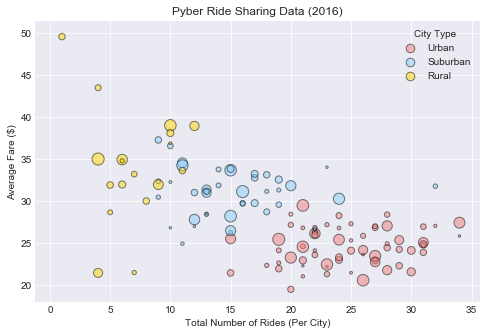

In [5]:
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)


city_type = ride_summary["City Type"].unique()
colors = ["lightcoral", "lightskyblue", "gold"]

ride_facetgrid = sns.FacetGrid(data=ride_summary, hue="City Type", hue_order=city_type, palette=colors)
ride_facetgrid.map(plt.scatter, 'Total Number of Rides', 'Average Fare', s=ride_summary['Total Number of Drivers'] * 2, alpha=0.5, marker='o', edgecolors="black", linewidth=1)
ride_facetgrid.fig.set_size_inches(8,5)

sns.set_style('darkgrid')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc='upper right', title="City Type")
plt.show()
plt.gcf().clear()


In [6]:
city_type_group = ride_summary.groupby('City Type')
city_type_summary = city_type_group.sum()
city_type_summary

,Average Fare,Total Number of Drivers,Total Number of Rides,Total Sum of Fares
City Type,,,,
Rural,615.728572,104,125,4255.09
Suburban,1268.627391,638,625,19317.88
Urban,1623.863390,2607,1625,40078.34


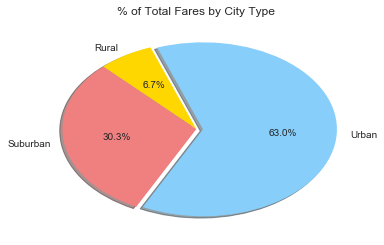

In [7]:
#In addition, you will be expected to produce the following three pie charts:
#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

city_type = ["Rural", "Suburban", "Urban"]
fare_sum = city_type_summary["Total Sum of Fares"]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)

plt.title("% of Total Fares by City Type")
plt.pie(fare_sum, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.show()

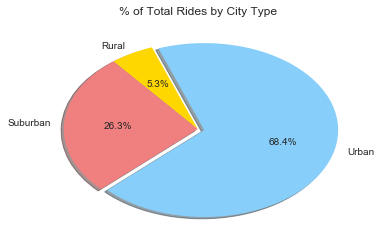

In [8]:
city_type = ["Rural", "Suburban", "Urban"]
number_rides = city_type_summary["Total Number of Rides"]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)

plt.title("% of Total Rides by City Type")
plt.pie(number_rides, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.show()

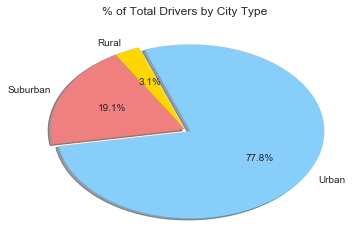

In [9]:
city_type = ["Rural", "Suburban", "Urban"]
driver_total = city_type_summary["Total Number of Drivers"]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)

plt.title("% of Total Drivers by City Type")
plt.pie(driver_total, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.show()